# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [ ]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [ ]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [ ]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        self.x = X
        self.y = y
        self.w = w
        return (1/len(self.x)) * np.sum((np.subtract(np.dot(self.x, self.w), self.y))**2)


    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        self.x = X
        self.y = y
        self.w = w
        return (2/len(self.x)) * np.dot(np.transpose(self.x), np.subtract(np.dot(self.x, self.w), self.y))

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [ ]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать
траекторию спуска (список из новых значений весов на каждом шаге)

In [ ]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    list_w = [w_init]
    for _ in range(n_iterations):
      w_init = w_init - lr * loss.calc_grad(X, y, w_init)
      list_w.append(w_init)
    return list_w

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [ ]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [ ]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045026
0.8670644395649493


In [ ]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss, title: str):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title(f"GD trajectory {title}")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

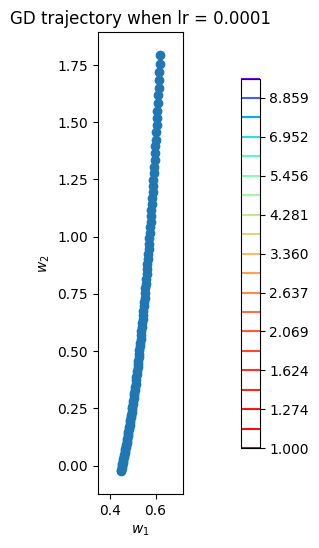

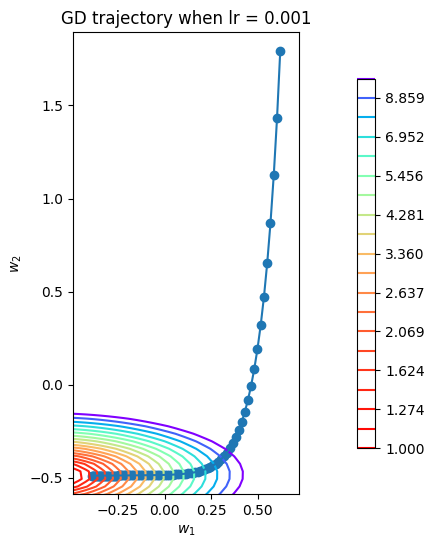

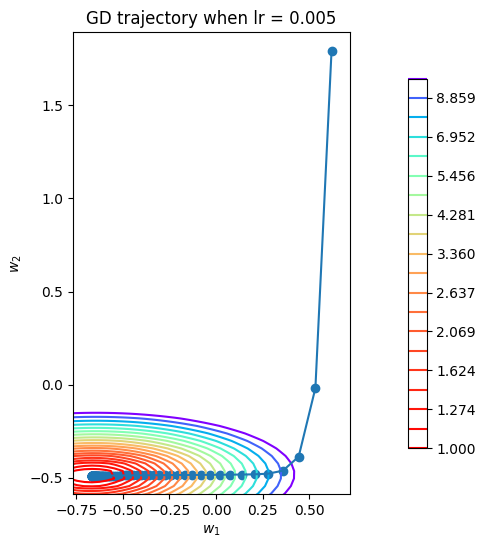

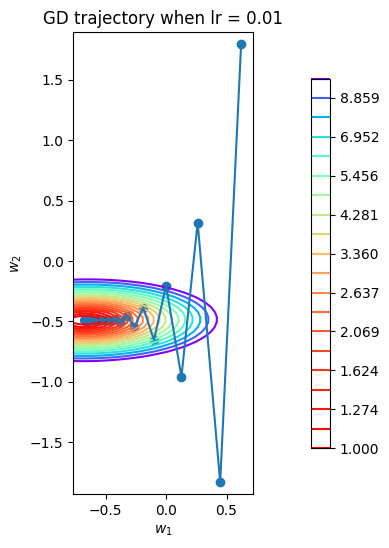

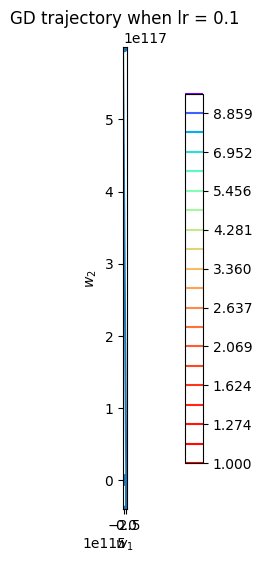

In [ ]:
list_lr = [0.0001, 0.001, 0.005, 0.01, 0.1]

for lr in list_lr:
  plot_gd(gradient_descent(w_init, X, y, loss, lr, 100), X, y, loss, title = f'when lr = {lr}')

**Вывод:** чем больше шаг, тем быстрее мы доходим до оптимального значения, это понятно. Видим, что при очень маленьких шагах (например, lr=0.0001 и lr=0.001 градиентный спуск вообще не доходит до оптимальной точки. В то же время при использовании большого шага (lr=0.01 и lr=0.1) траектории градиентного спуска начинают топтаться на месте, что тоже не хорошо, так как мы тратим время выполнения программы на ненужные шаги. И при шаге (lr=0.005) мы оптимально подошли к точке, возможно, даже без топтания на месте.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
    batch_X = X[batch_indices]
    batch_y = y[batch_indices]

    list_w = [w_init]

    for _ in range(n_iterations):
      w_init = w_init - lr * loss.calc_grad(batch_X, batch_y, w_init)
      list_w.append(w_init)
    return list_w

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

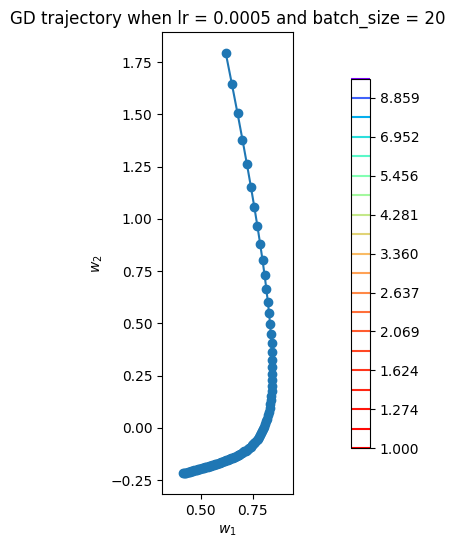

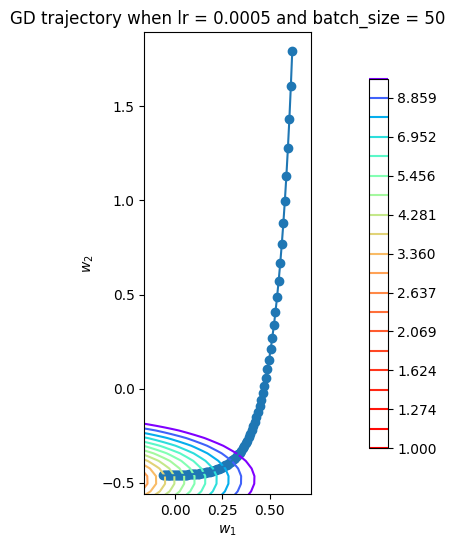

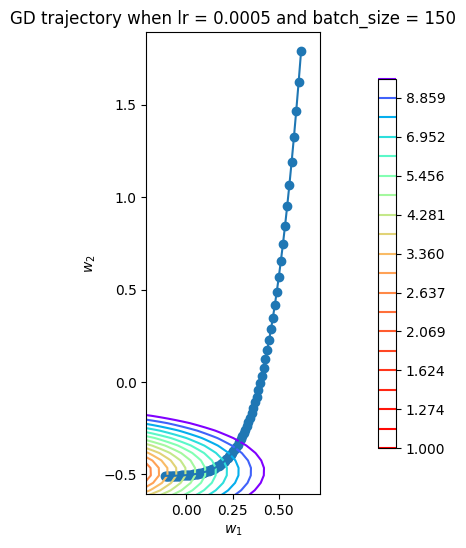

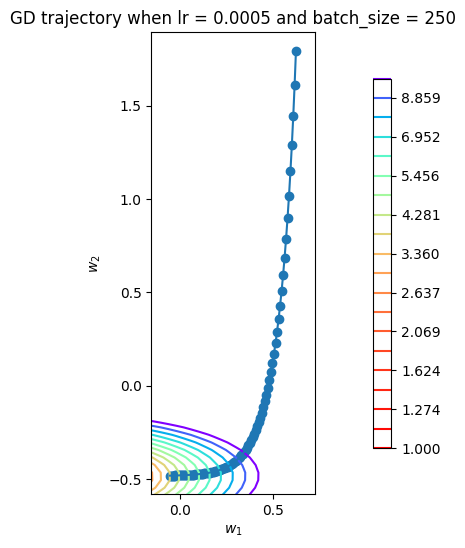

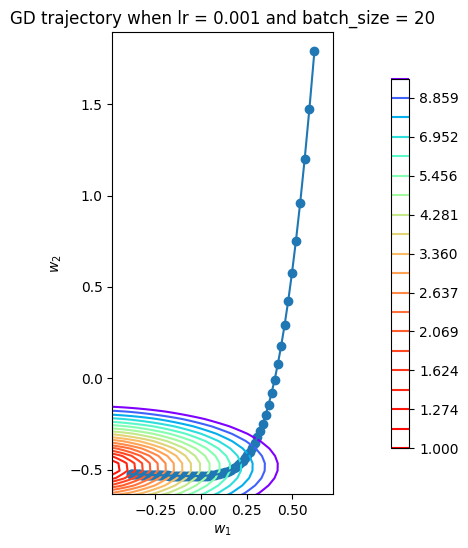

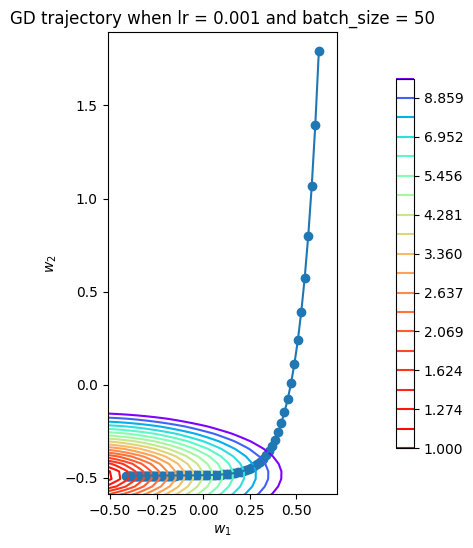

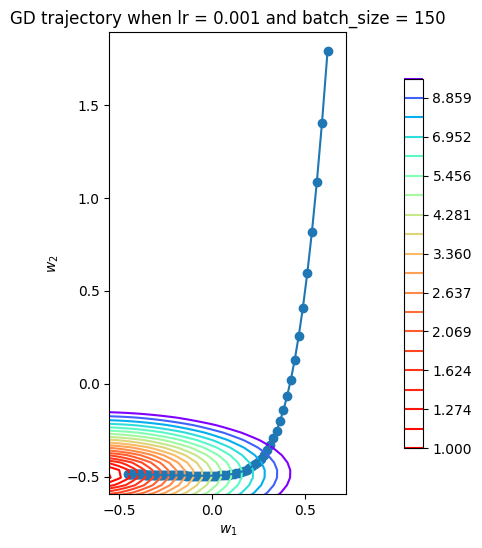

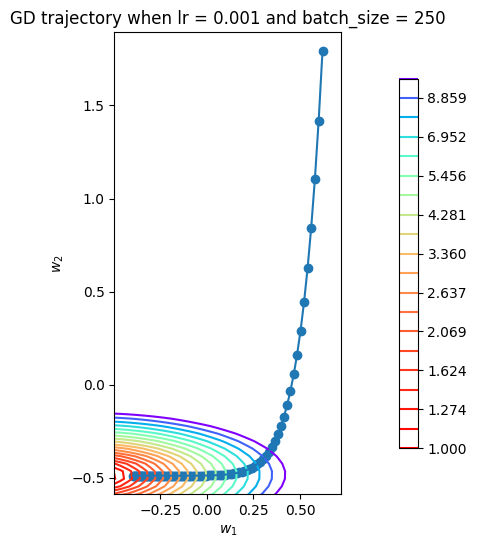

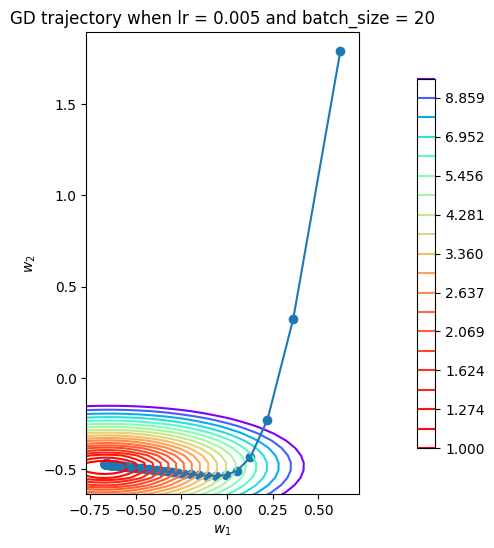

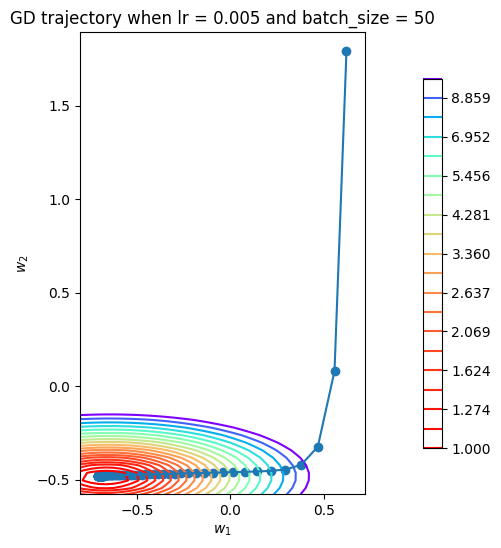

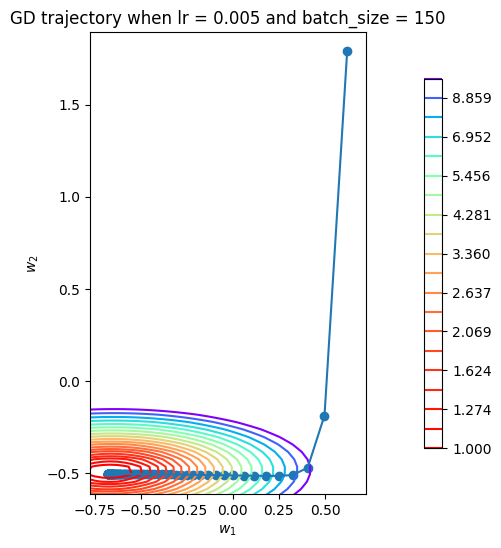

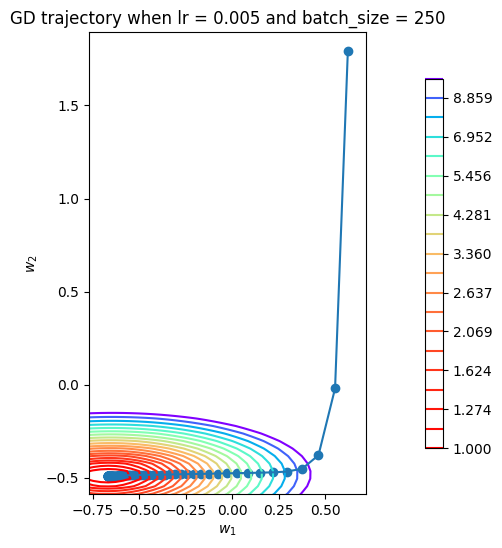

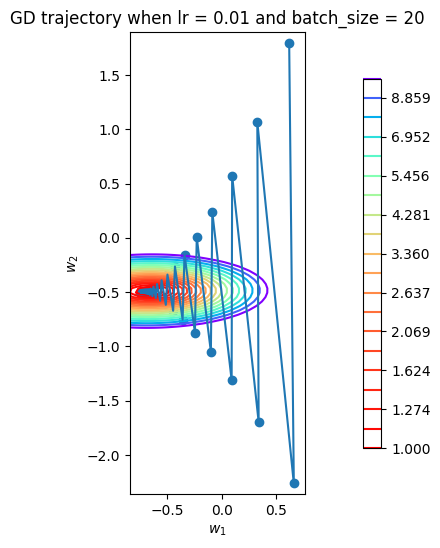

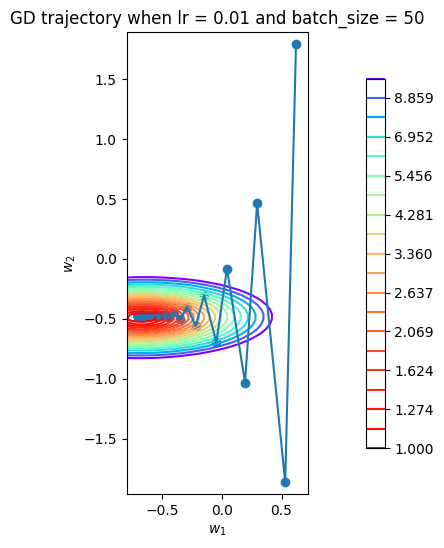

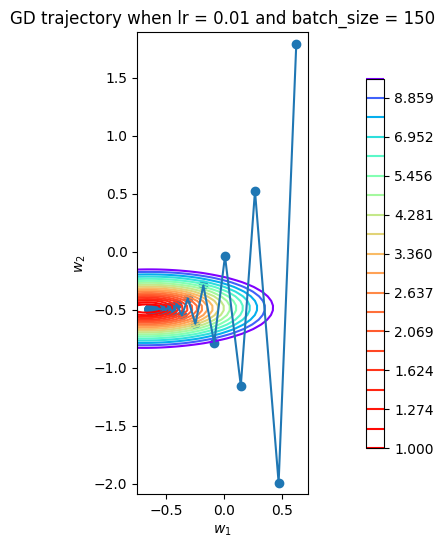

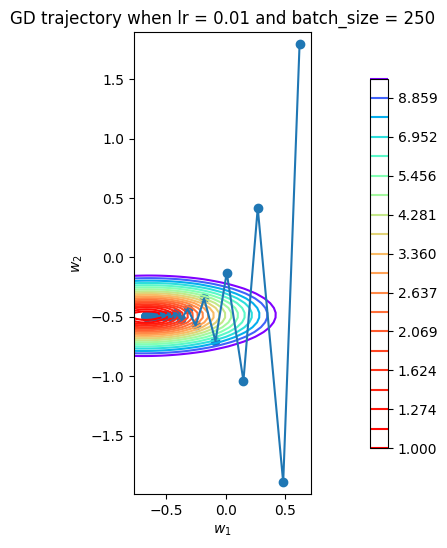

In [ ]:
list_lr = [0.0005, 0.001, 0.005, 0.01]
list_bs = [20, 50, 150, 250]

for lr in list_lr:
  for bs in list_bs:
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr, bs, 100), X, y, loss, title = f'when lr = {lr} and batch_size = {bs}')

**Вывод:** при маленьком шаге и любом размере выборки стох. градиентный спуск не дошёл до оптимального значения весов. При оптимальном шаге из прошлого пункта (lr=0.005) и маленьком размере выборки (20) спуск, как будто, перешёл через нужную точку. При большом шаге и маленькой выборке спуск также перешагнул точку, а при увеличении выборки снова началось хождение в одном и том же месте. Можно обобщить, что при очень маленькой выборке (~7% от общей (как я взяла)) и любом размере шага, градиентный спуск работает не хорошо (либо не доходит, либо переходит через точку). При выборке 50% от общей и более, стохастический градиентный спуск ведёт себя примерно так же, как и обычный.



Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
    batch_X = X[batch_indices]
    batch_y = y[batch_indices]

    w = w_init - (lr * (1/(1+0))**p) * loss.calc_grad(batch_X, batch_y, w_init)

    list_w = [w_init]

    for _ in range(n_iterations):
      list_w.append(w)
      w = w - (lr * (1/(1 + n_iterations))**p) * loss.calc_grad(batch_X, batch_y, w)
    return list_w

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

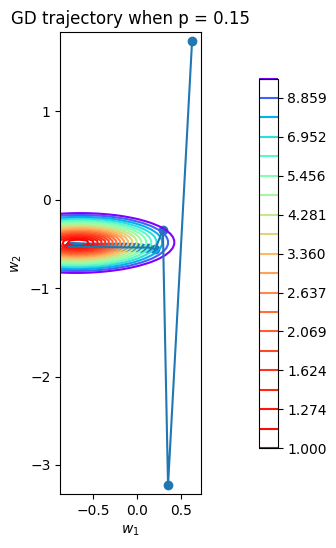

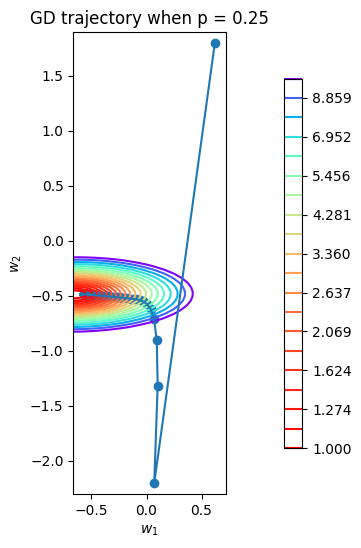

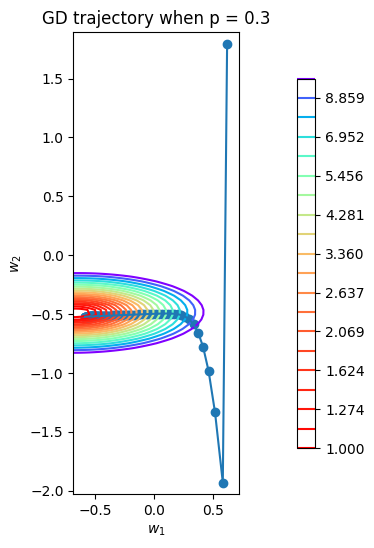

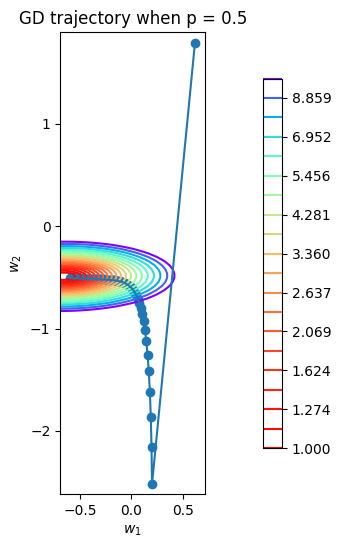

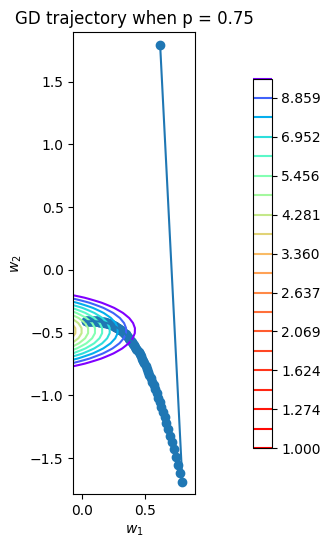

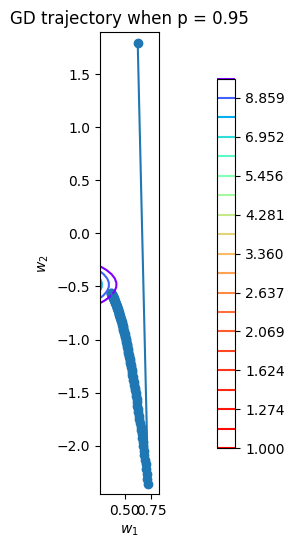

In [ ]:
list_p = [0.15, 0.25, 0.3, 0.5, 0.75, 0.95]

for p in list_p:
  plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p, 100), X, y, loss, title = f'when p = {p}')

**Вывод:** при увеличении p градиентный спуск начинает раньше останавливаться. При p=0.15 тректория вообще перепрыгнула оптимум. Поэтому разумно сказать, что для каждого случая свой оптимальный вариант значения p. В данном случае, как будто, p=0.5 - оптимально, на первый взгляд.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

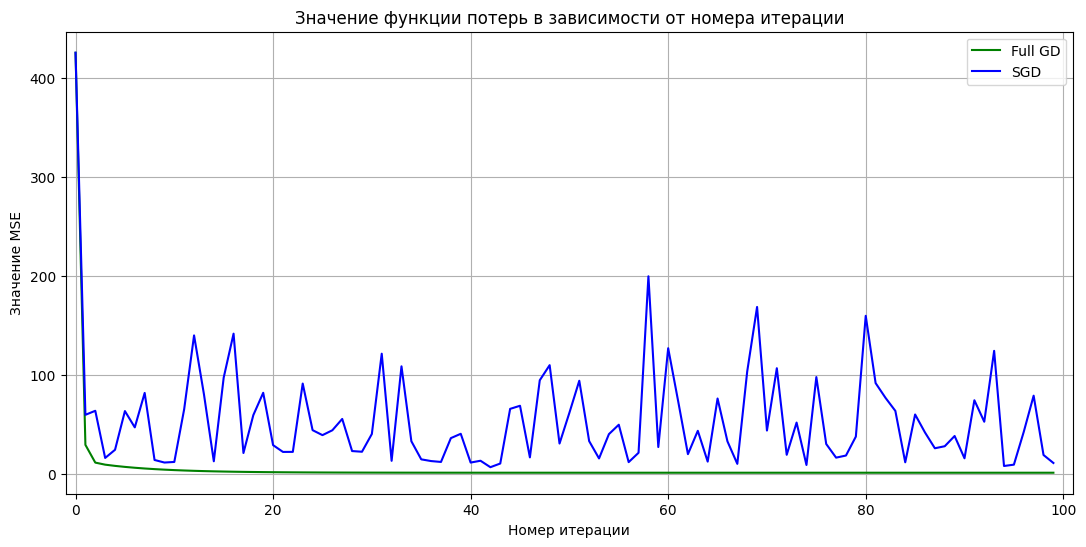

In [ ]:
mse_gd = []
mse_sgd = []
num_steps = 100
#lr = 0.005, так как данное значение хорошо показало себя в прошлых пунктах

for step in range(num_steps):
  w_gd = gradient_descent(w_init, X, y, loss, 0.005, num_steps)
  mse_gd.append(loss.calc_loss(X, y, w_gd[step]))
  w_sgd = stochastic_gradient_descent(w_init, X, y, loss, 0.005, 10, num_steps)
  mse_sgd.append(loss.calc_loss(X, y, w_sgd[step]))

plt.figure(figsize=(13, 6))
plt.plot(range(num_steps), mse_gd, color='green', label = 'Full GD')
plt.plot(range(num_steps), mse_sgd, color='blue', label = 'SGD')
plt.title('Значение функции потерь в зависимости от номера итерации')
plt.xlim((-1, num_steps + 1))
plt.legend()
plt.xlabel('Номер итерации')
plt.ylabel('Значение MSE')
plt.grid()
plt.show()

Видим, что от итерации к итерации значение функции потерь у стохастического градиентного спуска постоянно скачет, что не говорит нам о её преимуществе перед обычным градиентным спуском. Обычный гр. спуск, напротив, за несколько итераций находит оптимальную точку, в которой значение MSE минимально.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету,

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [ ]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        self.shape = X.shape
        self.w_init = np.zeros(self.shape[1]) #начальная инициализация

        list_w = gradient_descent(self.w_init, X, y, self.loss, self.lr)

        self.w = list_w[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return np.dot(X, self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [ ]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [ ]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [ ]:
X_raw.isna().sum()

index     0
0         0
1        37
2         0
3         0
4         0
5         2
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        4
19        4
20        0
21        2
22        2
23        0
24        0
dtype: int64

Видим много пропусков и столбец `Index`, предлагаю его убрать, так как он не несёт полезной информации и продолжить работу с пропусками.

In [ ]:
#удаляю столбец "Index" из данных
X_raw = X_raw.drop(['index'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

X_raw_object_values = (X_raw.dtypes=='object').values #столбцы с категориальными данными
X_raw_object = X_raw[X_raw.columns[X_raw_object_values]].fillna('') #заполнила пустыми строками пропуски в категор. данных

X_raw_num = X_raw[X_raw.columns[~X_raw_object_values]] #числовые данные
X_raw_numeric = X_raw_num.fillna(X_raw_num.mean()) #заполняю числовые данные средними значениями
normalizer = StandardScaler() #задала модель для нормализации
X_real_norm_np = normalizer.fit_transform(X_raw_numeric) #обучаем и трансформируем данные
X_real = pd.DataFrame(data=X_real_norm_np, columns=X_raw_numeric.columns)

X_no_mis = pd.concat([X_raw_object, X_real], axis=1) #конкатенация двух таблиц

X_no_mis.head()

,2,3,4,5,6,7,8,14,15,17,...,12,13,16,18,19,20,21,22,23,24
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,...,-2.034081,-0.014858,0.075389,0.520894,-1.829927,-0.291435,0.203984,-0.246556,-0.652249,-0.542288
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,...,-2.034081,-0.014858,0.075389,0.520894,-1.829927,-0.291435,0.203984,-0.246556,-0.652249,-0.542288
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,...,-0.559713,0.518080,0.606234,-2.433435,0.675938,-0.291435,1.357649,-0.246556,-0.964397,-0.689386
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,...,0.218425,-0.423766,-0.431327,-0.526210,0.453899,-0.041121,-0.037480,0.801833,-0.184027,-0.100993
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,...,0.218425,0.520017,0.220165,-0.526210,0.453899,-0.541748,0.311302,0.801833,-1.120471,-1.277779


In [ ]:
#кодирую категориальные данные

X_dum = pd.get_dummies(data=X_no_mis, drop_first=True, dtype=int)
X_dum.head()

,0,1,9,10,11,12,13,16,18,19,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.520894,-1.829927,...,0,0,0,0,0,0,0,1,0,0
1,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.520894,-1.829927,...,0,0,0,0,0,0,0,1,0,0
2,0.127193,0.000000,-0.710103,-0.244152,-0.185597,-0.559713,0.518080,0.606234,-2.433435,0.675938,...,0,0,0,0,0,0,0,1,0,0
3,0.926121,1.315931,0.165748,0.195176,0.148335,0.218425,-0.423766,-0.431327,-0.526210,0.453899,...,0,0,0,0,0,0,0,1,0,0
4,0.926121,1.315931,0.099646,0.195176,0.243744,0.218425,0.520017,0.220165,-0.526210,0.453899,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#делю выборку на train и test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, random_state = np.random.seed(100), test_size=0.3)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [ ]:
linear_regression = LinearRegression(MSELoss())
lin_reg = linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [ ]:
#предсказания модели

lin_reg_pred_train = lin_reg.predict(X_train)
lin_reg_pred_test = lin_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

print(f'MSE for train: {mean_squared_error(y_train, lin_reg_pred_train)}')
print(f'MSE for test: {mean_squared_error(y_test, lin_reg_pred_test)}')

MSE for train: 1485510.5088318689
MSE for test: 6679174.282149008


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [ ]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        self.x = X
        self.y = y
        self.w = w
        w_2 = list(self.w)
        self.w_2 = np.asarray(w_2[0:-1])

        return (1/len(self.x)) * (np.sum((np.subtract(np.dot(self.x, self.w), self.y))**2)) + self.coef * np.sum(((self.w_2)**2))


    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        self.x = X
        self.y = y
        self.w = w
        w_3 = list(self.w)
        w_3[-1] = 0
        self.w_3 = np.asarray(w_3)

        return (2/len(self.x)) * np.dot(np.transpose(self.x), np.subtract(np.dot(self.x, self.w), self.y)) + 2 * self.coef * self.w_3

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [ ]:
#linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [ ]:
from sklearn.metrics import mean_squared_error

list_l = [0.1, 0.01, 0.001, 0.005, 0.006, 0.0001]

list_mse_train = []
list_mse_test = []

for l in list_l:
  linear_reg = LinearRegression(MSEL2Loss(l))
  lin_reg_l2 = linear_reg.fit(X_train, y_train)
  y_train_pred_l2 = lin_reg_l2.predict(X_train)
  y_test_pred_l2 = lin_reg_l2.predict(X_test)
  mse_train = mean_squared_error(y_train, y_train_pred_l2)
  mse_test = mean_squared_error(y_test, y_test_pred_l2)
  list_mse_train.append(mse_train)
  list_mse_test.append(mse_test)

In [ ]:
#mse на train
list_mse_train

[4639684.744949326,
 2245236.650077156,
 1584572.1327934184,
 1922045.5177775077,
 1994251.5437195655,
 1493529.7577234642]

MSE уменьшается

In [ ]:
#mse на test
list_mse_test

[11948915.46076244,
 8972796.536601748,
 7031298.344045552,
 8239615.200501545,
 8426786.787709113,
 6586441.163700874]

MSE сначала уменьшалась, потом увеличилась

Выберу в качестве оптимального значения - 0.0001, потому что именно при данном значении коэффициента MSE на тесте была минимальной.

In [ ]:
linear_reg = LinearRegression(MSEL2Loss(0.0001))

lin_reg_l2 = linear_reg.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_pred_l2 = lin_reg_l2.predict(X_train)
y_test_pred_l2 = lin_reg_l2.predict(X_test)

print(f'MSE train L2: {mean_squared_error(y_train, y_train_pred_l2)}')
print(f'MSE test L2: {mean_squared_error(y_test, y_test_pred_l2)}')

MSE train L2: 1493529.7577234642
MSE test L2: 6586441.163700874


На обучающей выборке MSE выше у регрессии с регуляризацией, при этом на тестовой выборке MSE у неё ниже, если мы сравниваем с регрессией без регуляризации.

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [ ]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps


    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        self.x = X
        self.y = y
        self.w = w

        self.z = np.dot(self.x, self.w) - self.y

        self.list_f = []
        for ind in range(len(self.x)):
          if -self.eps < self.z[ind] < self.eps:
            self.f = (1/2) * (self.z[ind])**2
            self.list_f.append(self.f)
          else:
            self.f = self.eps * (abs(self.z[ind]) - (1/2) * self.eps)
            self.list_f.append(self.f)

        self.list_f = np.asarray(self.list_f)

        return (1/len(self.x)) * np.sum(self.list_f)


    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

        self.x = X
        self.y = y
        self.w = w

        self.z = np.dot(self.x, self.w) - self.y

        self.list_f = []
        for ind in range(len(self.x)):
          if -self.eps < self.z[ind] < self.eps:
            self.f = self.z[ind]
            self.list_f.append(self.f)
          else:
            if self.z[ind] < 0:
              self.f = -self.eps
              self.list_f.append(self.f)
            elif self.z[ind] == 0:
              self.f = 0
              self.list_f.append(self.f)
            else:
              self.f = self.eps
              self.list_f.append(self.f)

        self.list_f = np.asarray(self.list_f)

        return (1/len(self.x)) * np.sum(np.dot(np.transpose(self.x), self.list_f))

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [ ]:
lr_hl = LinearRegression(HuberLoss(1000))

lin_reg_hl = lr_hl.fit(X_train, y_train)

In [ ]:
pred_hl_train = lin_reg_hl.predict(X_train)
pred_hl_test = lin_reg_hl.predict(X_test)

print(f'MSE train HuberLoss: {mean_squared_error(y_train, pred_hl_train)}')
print(f'MSE test HuberLoss: {mean_squared_error(y_test, pred_hl_test)}')

MSE train HuberLoss: 25167847.499337874
MSE test HuberLoss: 41570497.97468


Видим, что по сравнению с регрессией, обученной с MSELoss, MSE у регрессии с HuberLoss на несколько десятков миллионов выше.